<br><br>

<center><u><font size="5" color="blue">Predicting Long Term Economic Opportunities</font></u></center>


<br>



`Use data available from reputable sources to develop a view of the future on a five-year horizon that would inform your investment strategy `

<br>


<pre>

    I wanted to compare the cpi index vs the rise in college costs, as I suspected the cost of a college education
    was unreasonable and not supportable in the future.
    
</pre>

[This site](https://educationdata.org/average-cost-of-college-by-year#:~:text=The%20rising%20costs%20of%20college,130%25%20after%20adjusting%20for%20inflation.) concluded that the average cost of college tuition & fees at public 4-year institutions has risen 179.2% over the last 20 years for an average annual increase of 9.0%.



<pre>

This despite the fact that there is a huge increase in educational resources offered by technology.

</pre>


I believe in the near future there will be a paradigm shift in what higher eduction should be.

Technology driven alternatives will render the current state obsolete. 

In my view, college education isnt respected the way it used to be, not only due to costs relative
to what it actually costs to learn, but also some of the cultural expressions seem out of step with the real world.


There are many studies of this out there but I created my own plot comparing college costs to the cpi rate since 1968.

This is in unadjusted dollars for all institutions 4 year and 2 year.
<br>


<br>

The cpi data comes from [here](https://data.bls.gov/timeseries/CUUR0000SA0L1E?output_view=pct_12mths)

The college cost data comes from [here](https://www.bls.gov/opub/ted/2016/college-tuition-and-fees-increase-63-percent-since-january-2006.htm)

<br>

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

file_path=r'C:\Users\arono\source\python\DATA618\more'
file_name='CPI.xlsx'
xlsxfile=file_path+ "\\" +file_name
cdf = pd.read_excel(xlsxfile, header=0)

In [56]:
mask = (cdf['Year']  > 1967) & (cdf['Year']  < 2021)
cpi_df = cdf.loc[mask]
dates=pd.date_range(datetime(1968,1,1),datetime(2020,1,1), freq='YS').tolist()
cpi_df.index=dates

In [69]:
file_name='college_cost_parsed.xls'
xlsxfile=file_path+ "\\" +file_name

df = pd.read_excel(xlsxfile, header=0)
df.index=dates

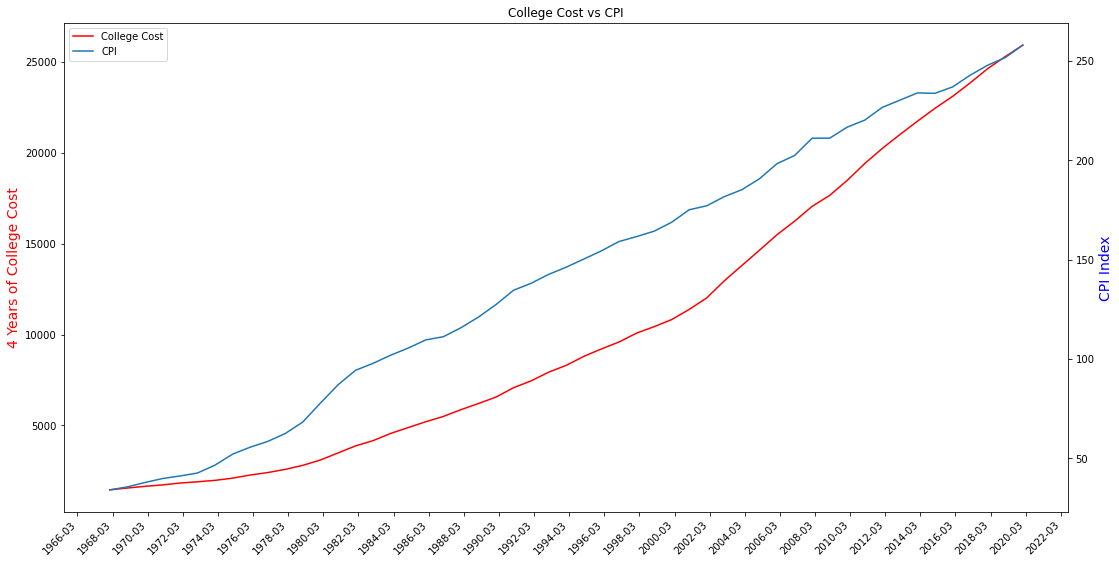

In [71]:
from mpl_toolkits.axes_grid1 import host_subplot


plt.figure(figsize=(18, 9))  

months_24_Loc = mlb.dates.MonthLocator(interval=24)
xFmt = mlb.dates.DateFormatter('%Y-%m')

# fig, ax = plt.subplots(nrows=1, ncols=1, sharey=False, tight_layout=True, figsize=(12, 6))

ax = host_subplot(111)


ax2=ax.twinx()     # 2 different y values
ax.plot_date(df.index,df['Cost'], '-',label='College Cost', color="red")
ax2.plot_date(cpi_df.index, cpi_df['Jan'], '-', label='CPI')


ax.set_title("College Cost vs CPI")
ax.xaxis.set_major_locator(months_24_Loc) 
ax.xaxis.set_minor_formatter(xFmt)  
ax2.xaxis.set_major_locator(months_24_Loc) 
ax2.xaxis.set_minor_formatter(xFmt)  
ax.set_ylabel("4 Years of College Cost",    color="red",         fontsize=14)
ax2.set_ylabel("CPI Index",    color="blue",         fontsize=14)
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')  # have to force the rotation here
plt.xticks(rotation = 45, ha='right') 
plt.legend(loc='upper left')
plt.show()